In [2]:
library(kernlab)
library(ggplot2)
library(cowplot)

In [3]:
data(spam)

In [14]:
colnames(spam)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

In [8]:
# george, num3d, charExclamation

In [12]:
boxplots <- function(var, nonzero=TRUE) {

    box_all <- ggplot(data=spam, aes(x=type, y=!!as.name(var))) + 
                geom_boxplot(fill='seagreen4') +
                ggtitle(paste(var, ' - all records, no transformation')) +
                theme(
                plot.title = element_text(size = 16),
                axis.title = element_text(size = 14),         
                axis.text.x = element_text(size = 14),        
                axis.text.y = element_text(size = 14))

    box_log <- ggplot(data=spam, aes(x=type, y=log(!!as.name(var)+0.1))) + 
                geom_boxplot(fill='seagreen4') +
                ggtitle(paste(var, ' - all records, log(x+0.1) transformation')) +
                theme(
                plot.title = element_text(size = 16),
                axis.title = element_text(size = 14),         
                axis.text.x = element_text(size = 14),        
                axis.text.y = element_text(size = 14))

    box_zscore <- ggplot(data=spam, aes(x=type, y=scale(!!as.name(var)))) + 
                geom_boxplot(fill='seagreen4') +
                ggtitle(paste(var, ' - all records, zscore transformation')) +
                theme(
                plot.title = element_text(size = 16),
                axis.title = element_text(size = 14),         
                axis.text.x = element_text(size = 14),        
                axis.text.y = element_text(size = 14))

    if (nonzero==TRUE) {
        box_nonzero <- ggplot(data=spam[spam[[var]] != 0, ], aes(x=type, y=!!as.name(var))) + 
                    geom_boxplot(fill='seagreen4') +
                    ggtitle(paste(var, ' - nonzero records, no transformation')) +
                    theme(
                    plot.title = element_text(size = 16),
                    axis.title = element_text(size = 14),         
                    axis.text.x = element_text(size = 14),        
                    axis.text.y = element_text(size = 14))

        box_nonzero_log <- ggplot(data=spam[spam[[var]] != 0, ], aes(x=type, y=log(!!as.name(var)+0.1))) + 
                    geom_boxplot(fill='seagreen4') +
                    ggtitle(paste(var, ' - nonzero records, log(x+0.1) transformation')) +
                    theme(
                    plot.title = element_text(size = 16),
                    axis.title = element_text(size = 14),         
                    axis.text.x = element_text(size = 14),        
                    axis.text.y = element_text(size = 14))

        box_nonzero_zscore <- ggplot(data=spam[spam[[var]] != 0, ], aes(x=type, y=scale(!!as.name(var)))) + 
                    geom_boxplot(fill='seagreen4') +
                    ggtitle(paste(var, ' - nonzero records, zscore transformation')) +
                    theme(
                    plot.title = element_text(size = 16),
                    axis.title = element_text(size = 14),         
                    axis.text.x = element_text(size = 14),        
                    axis.text.y = element_text(size = 14))
                    
        plot_grid(box_all, box_log, box_zscore, box_nonzero, box_nonzero_log, box_nonzero_zscore, ncol = 2)
    }

    else {
        plot_grid(box_all, box_log, box_zscore, ncol = 1)
    }

}

In [13]:
options(repr.plot.width = 15, repr.plot.height = 21)

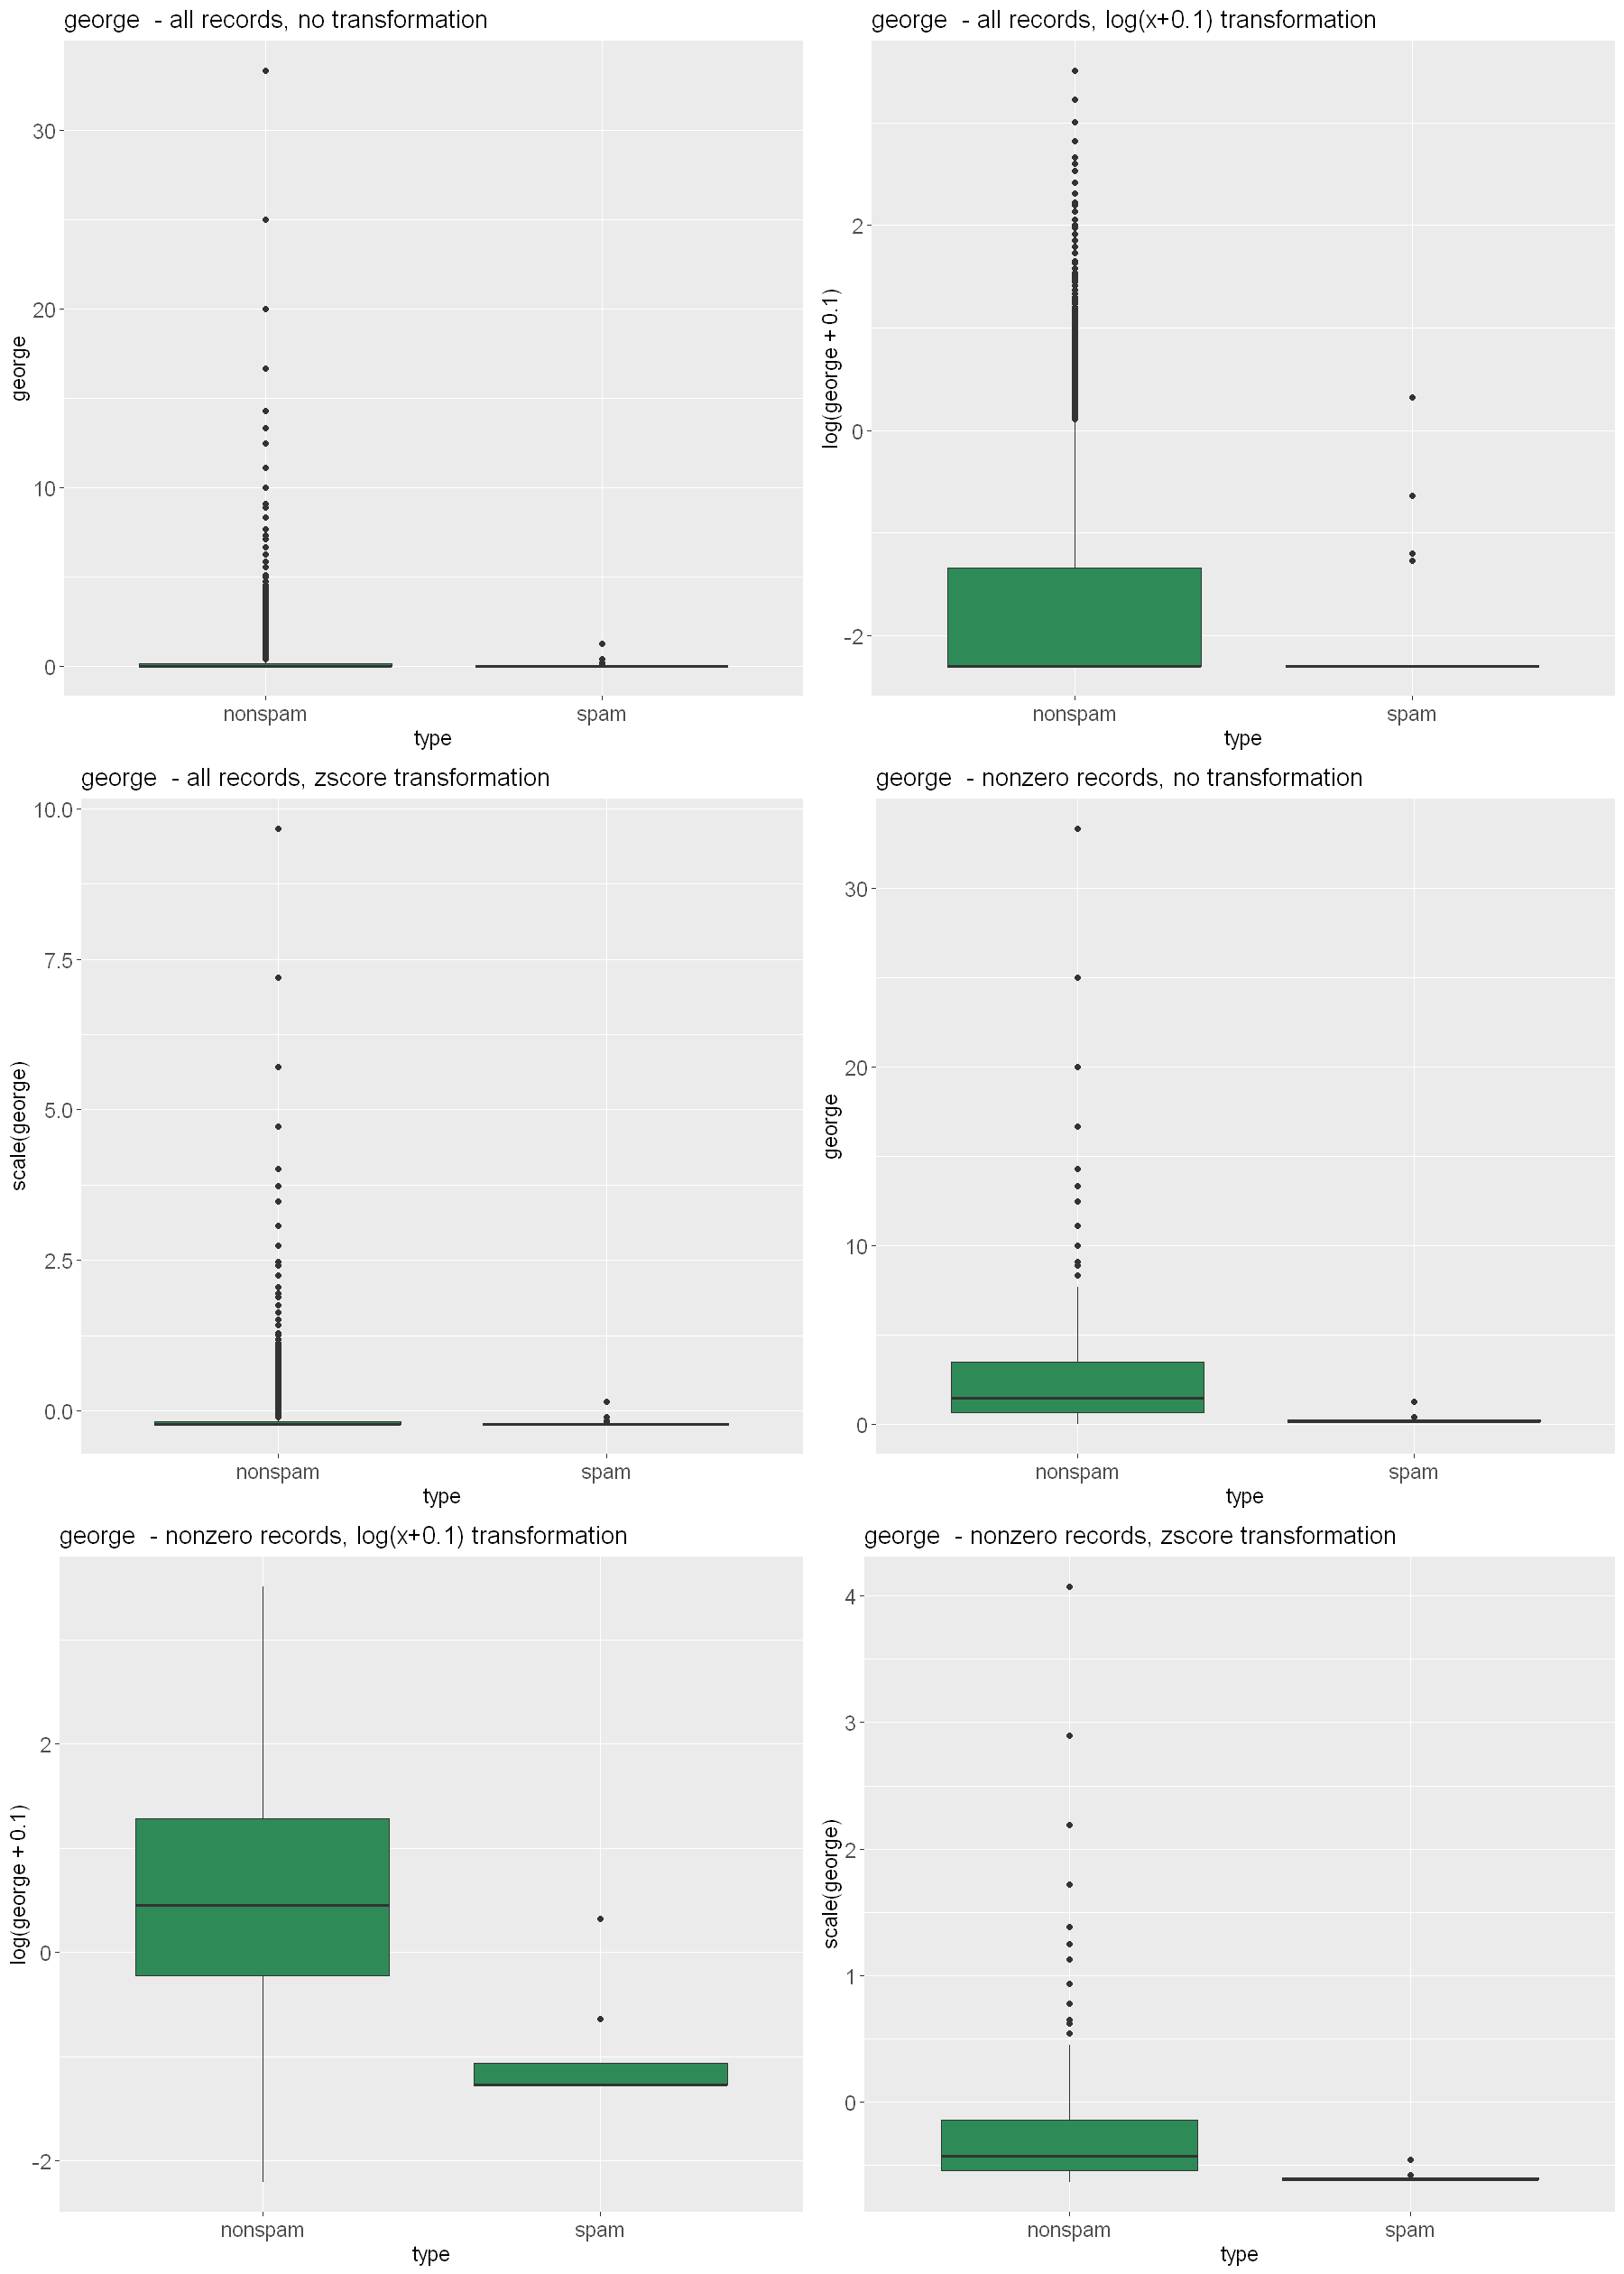

In [14]:
boxplots('george')

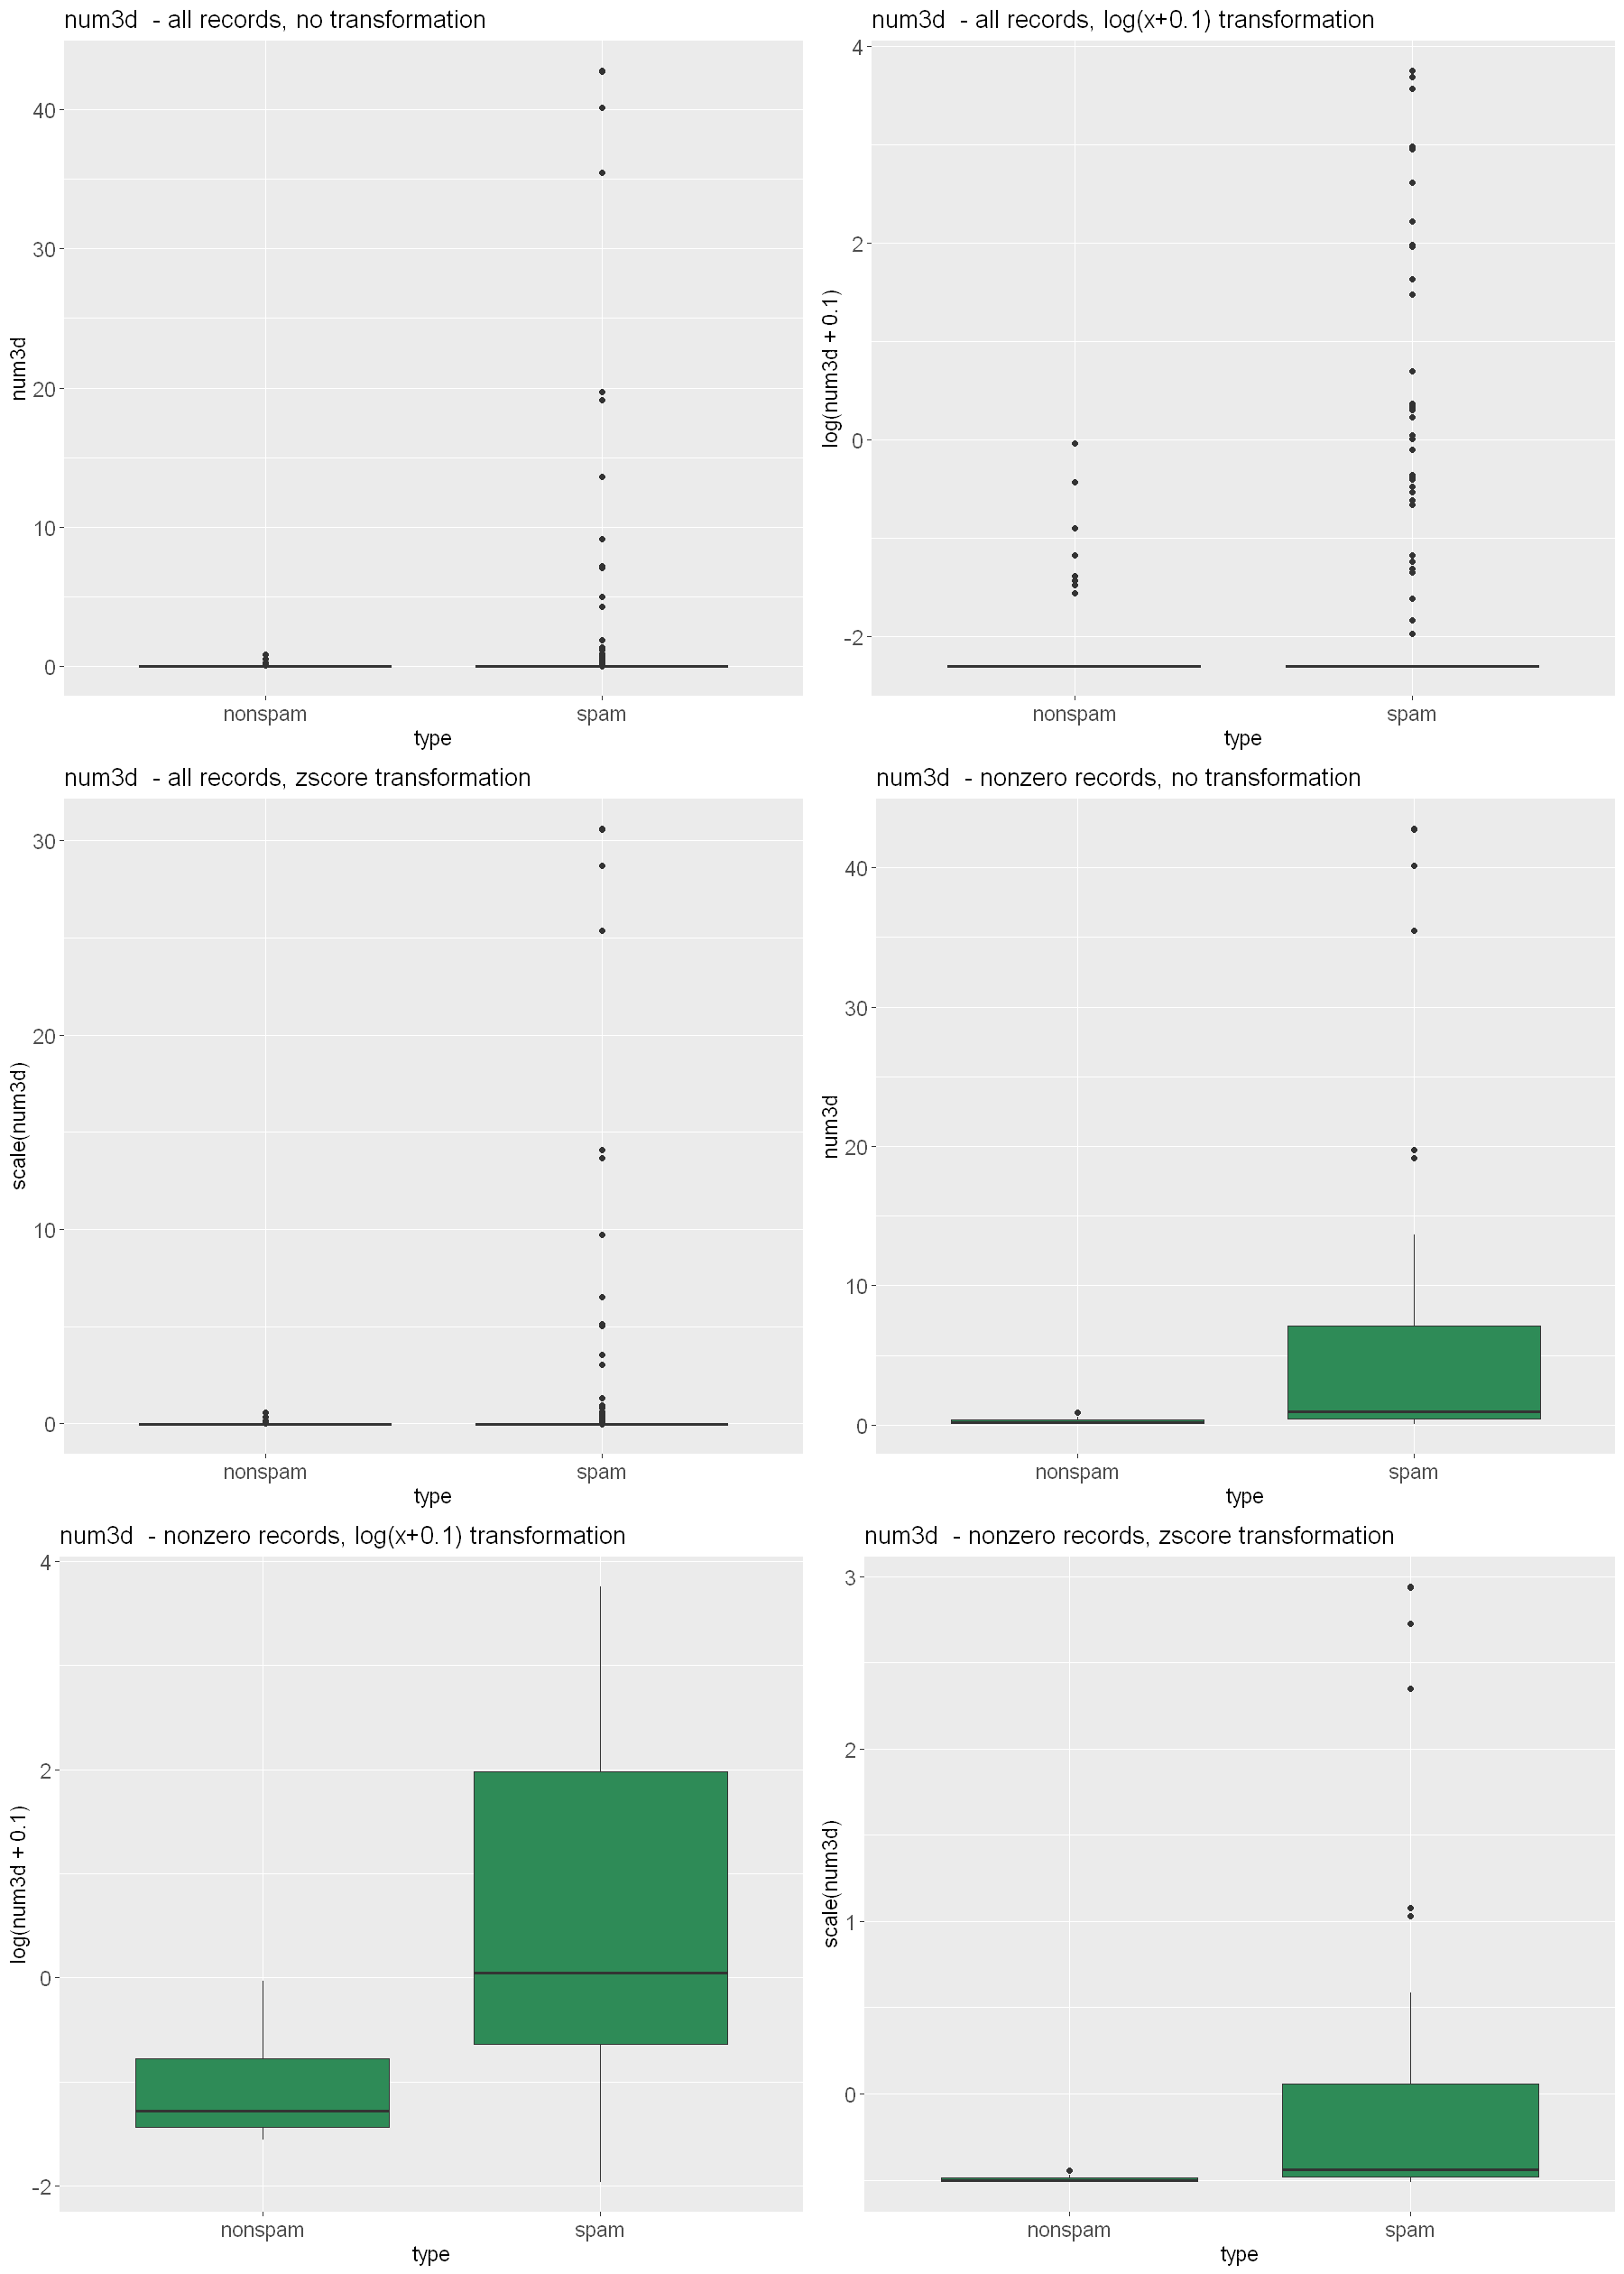

In [7]:
boxplots('num3d')

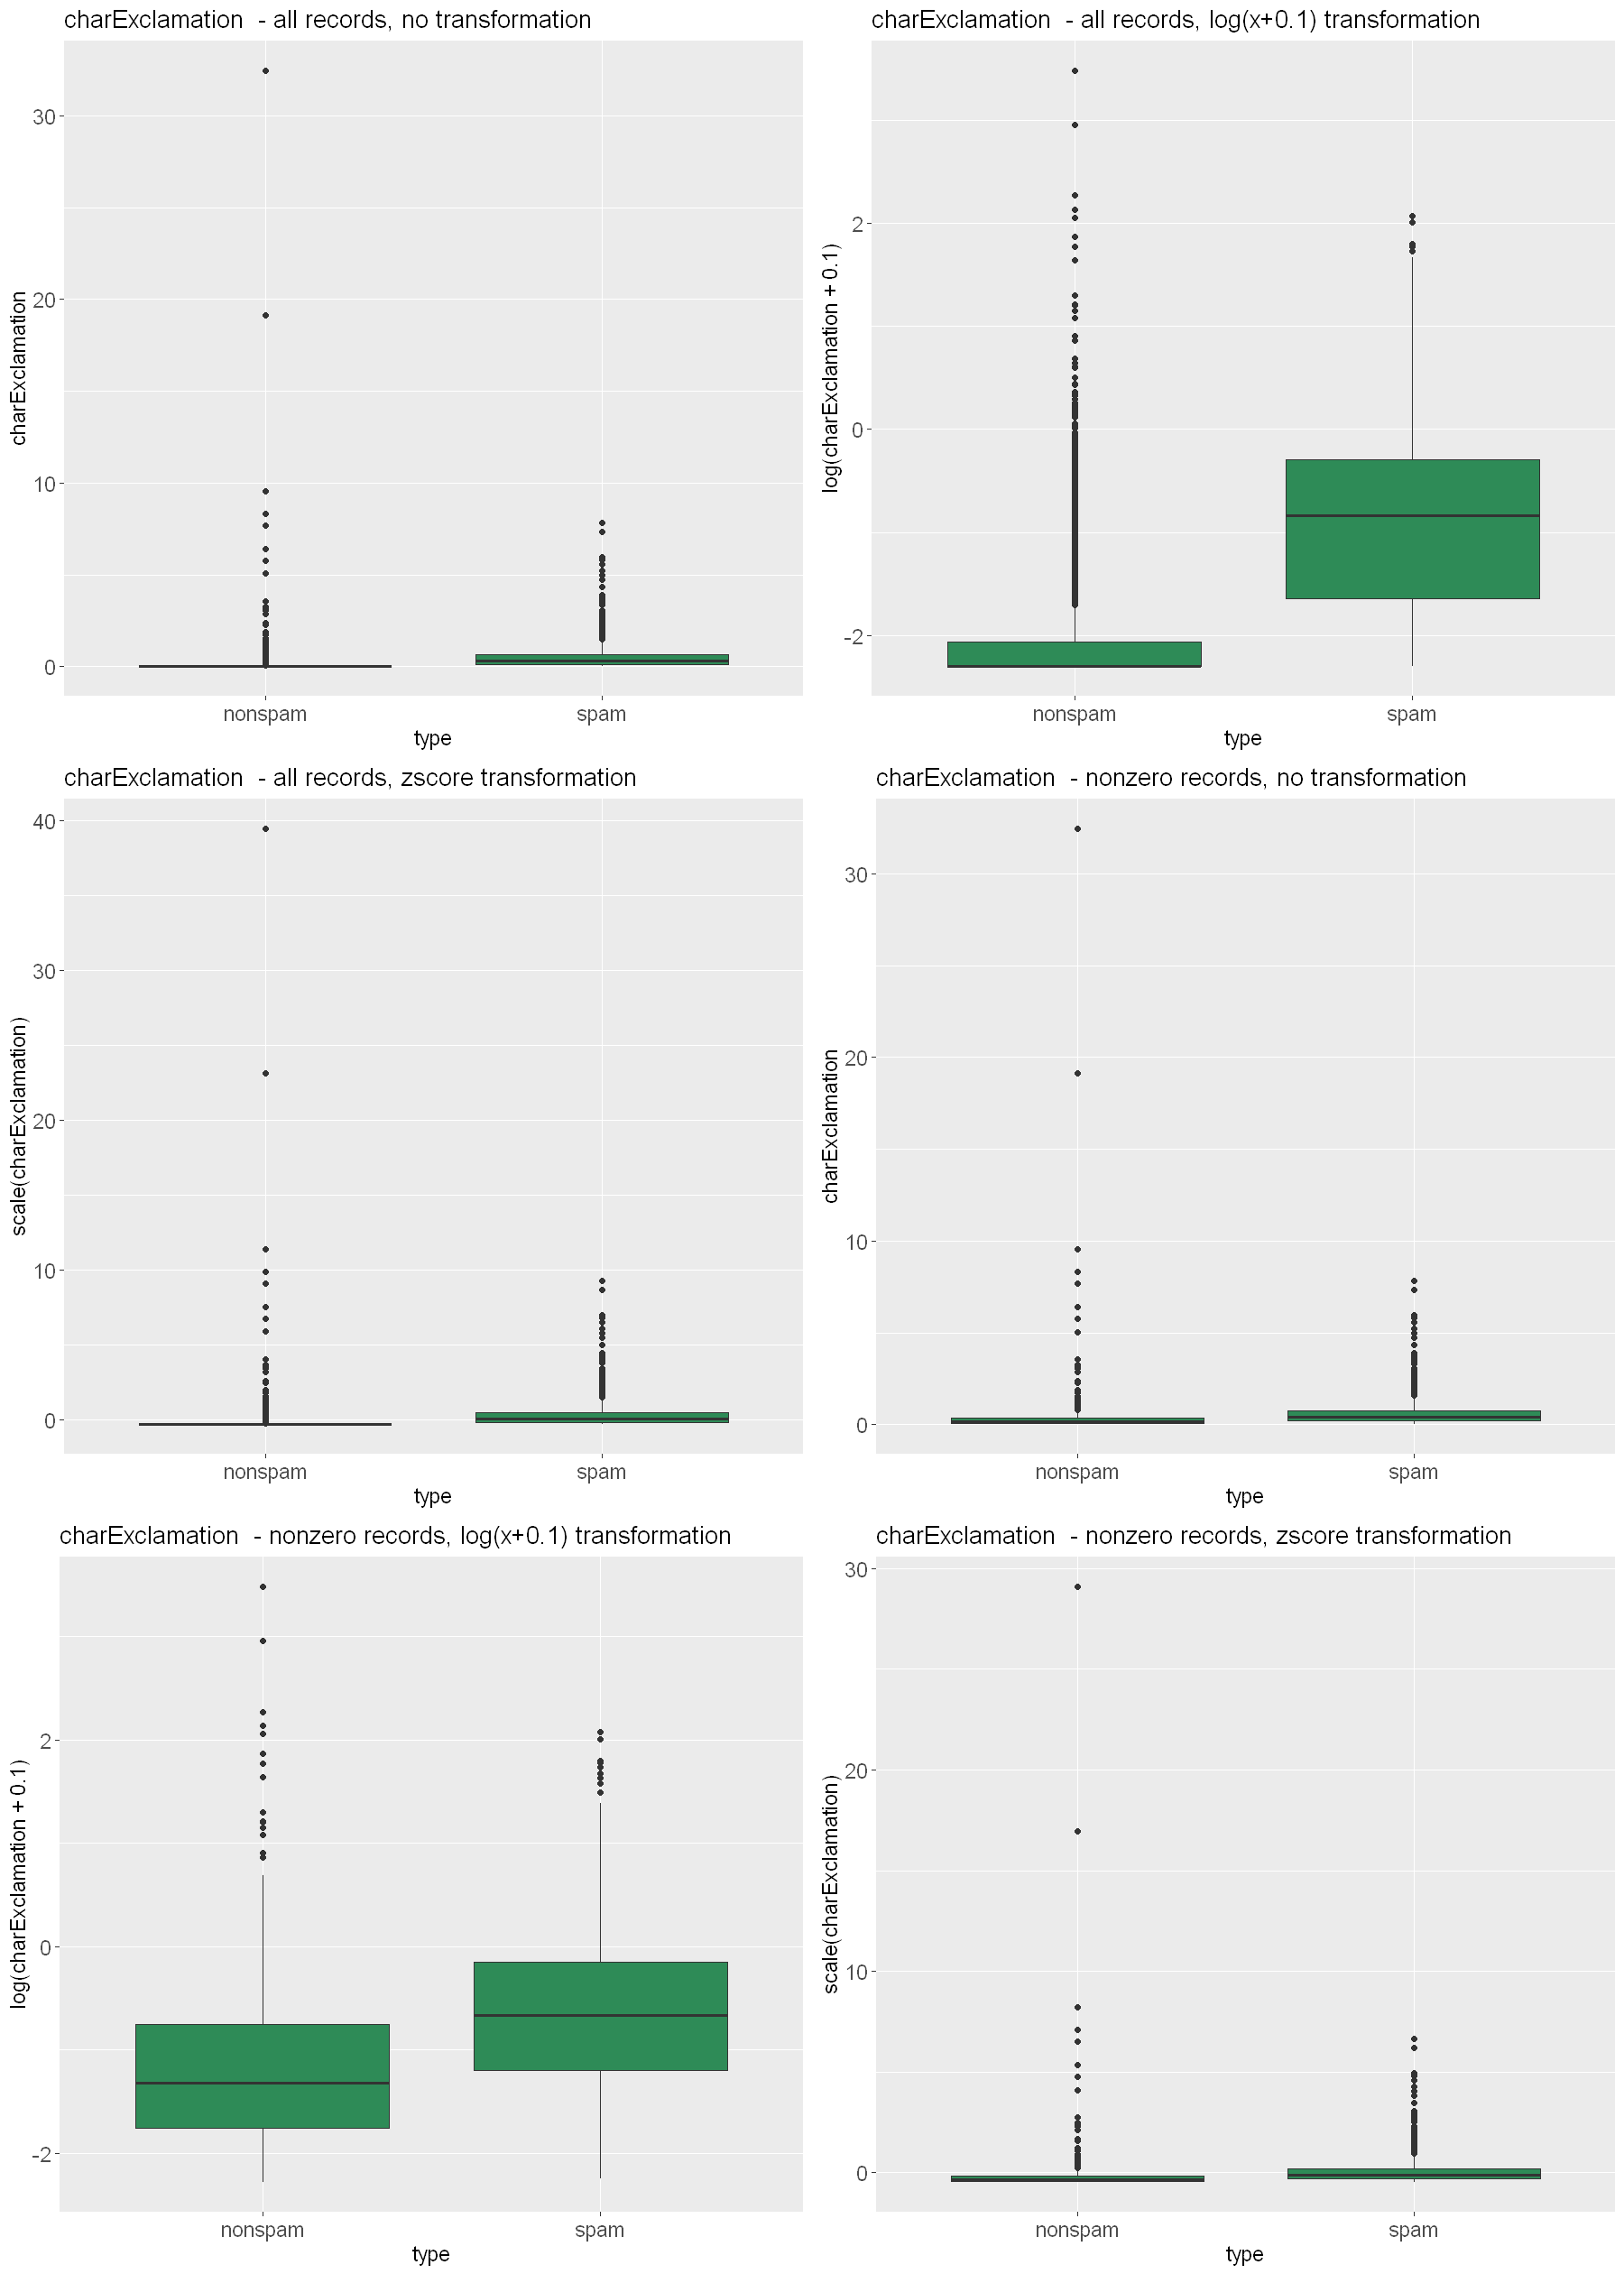

In [8]:
boxplots('charExclamation')

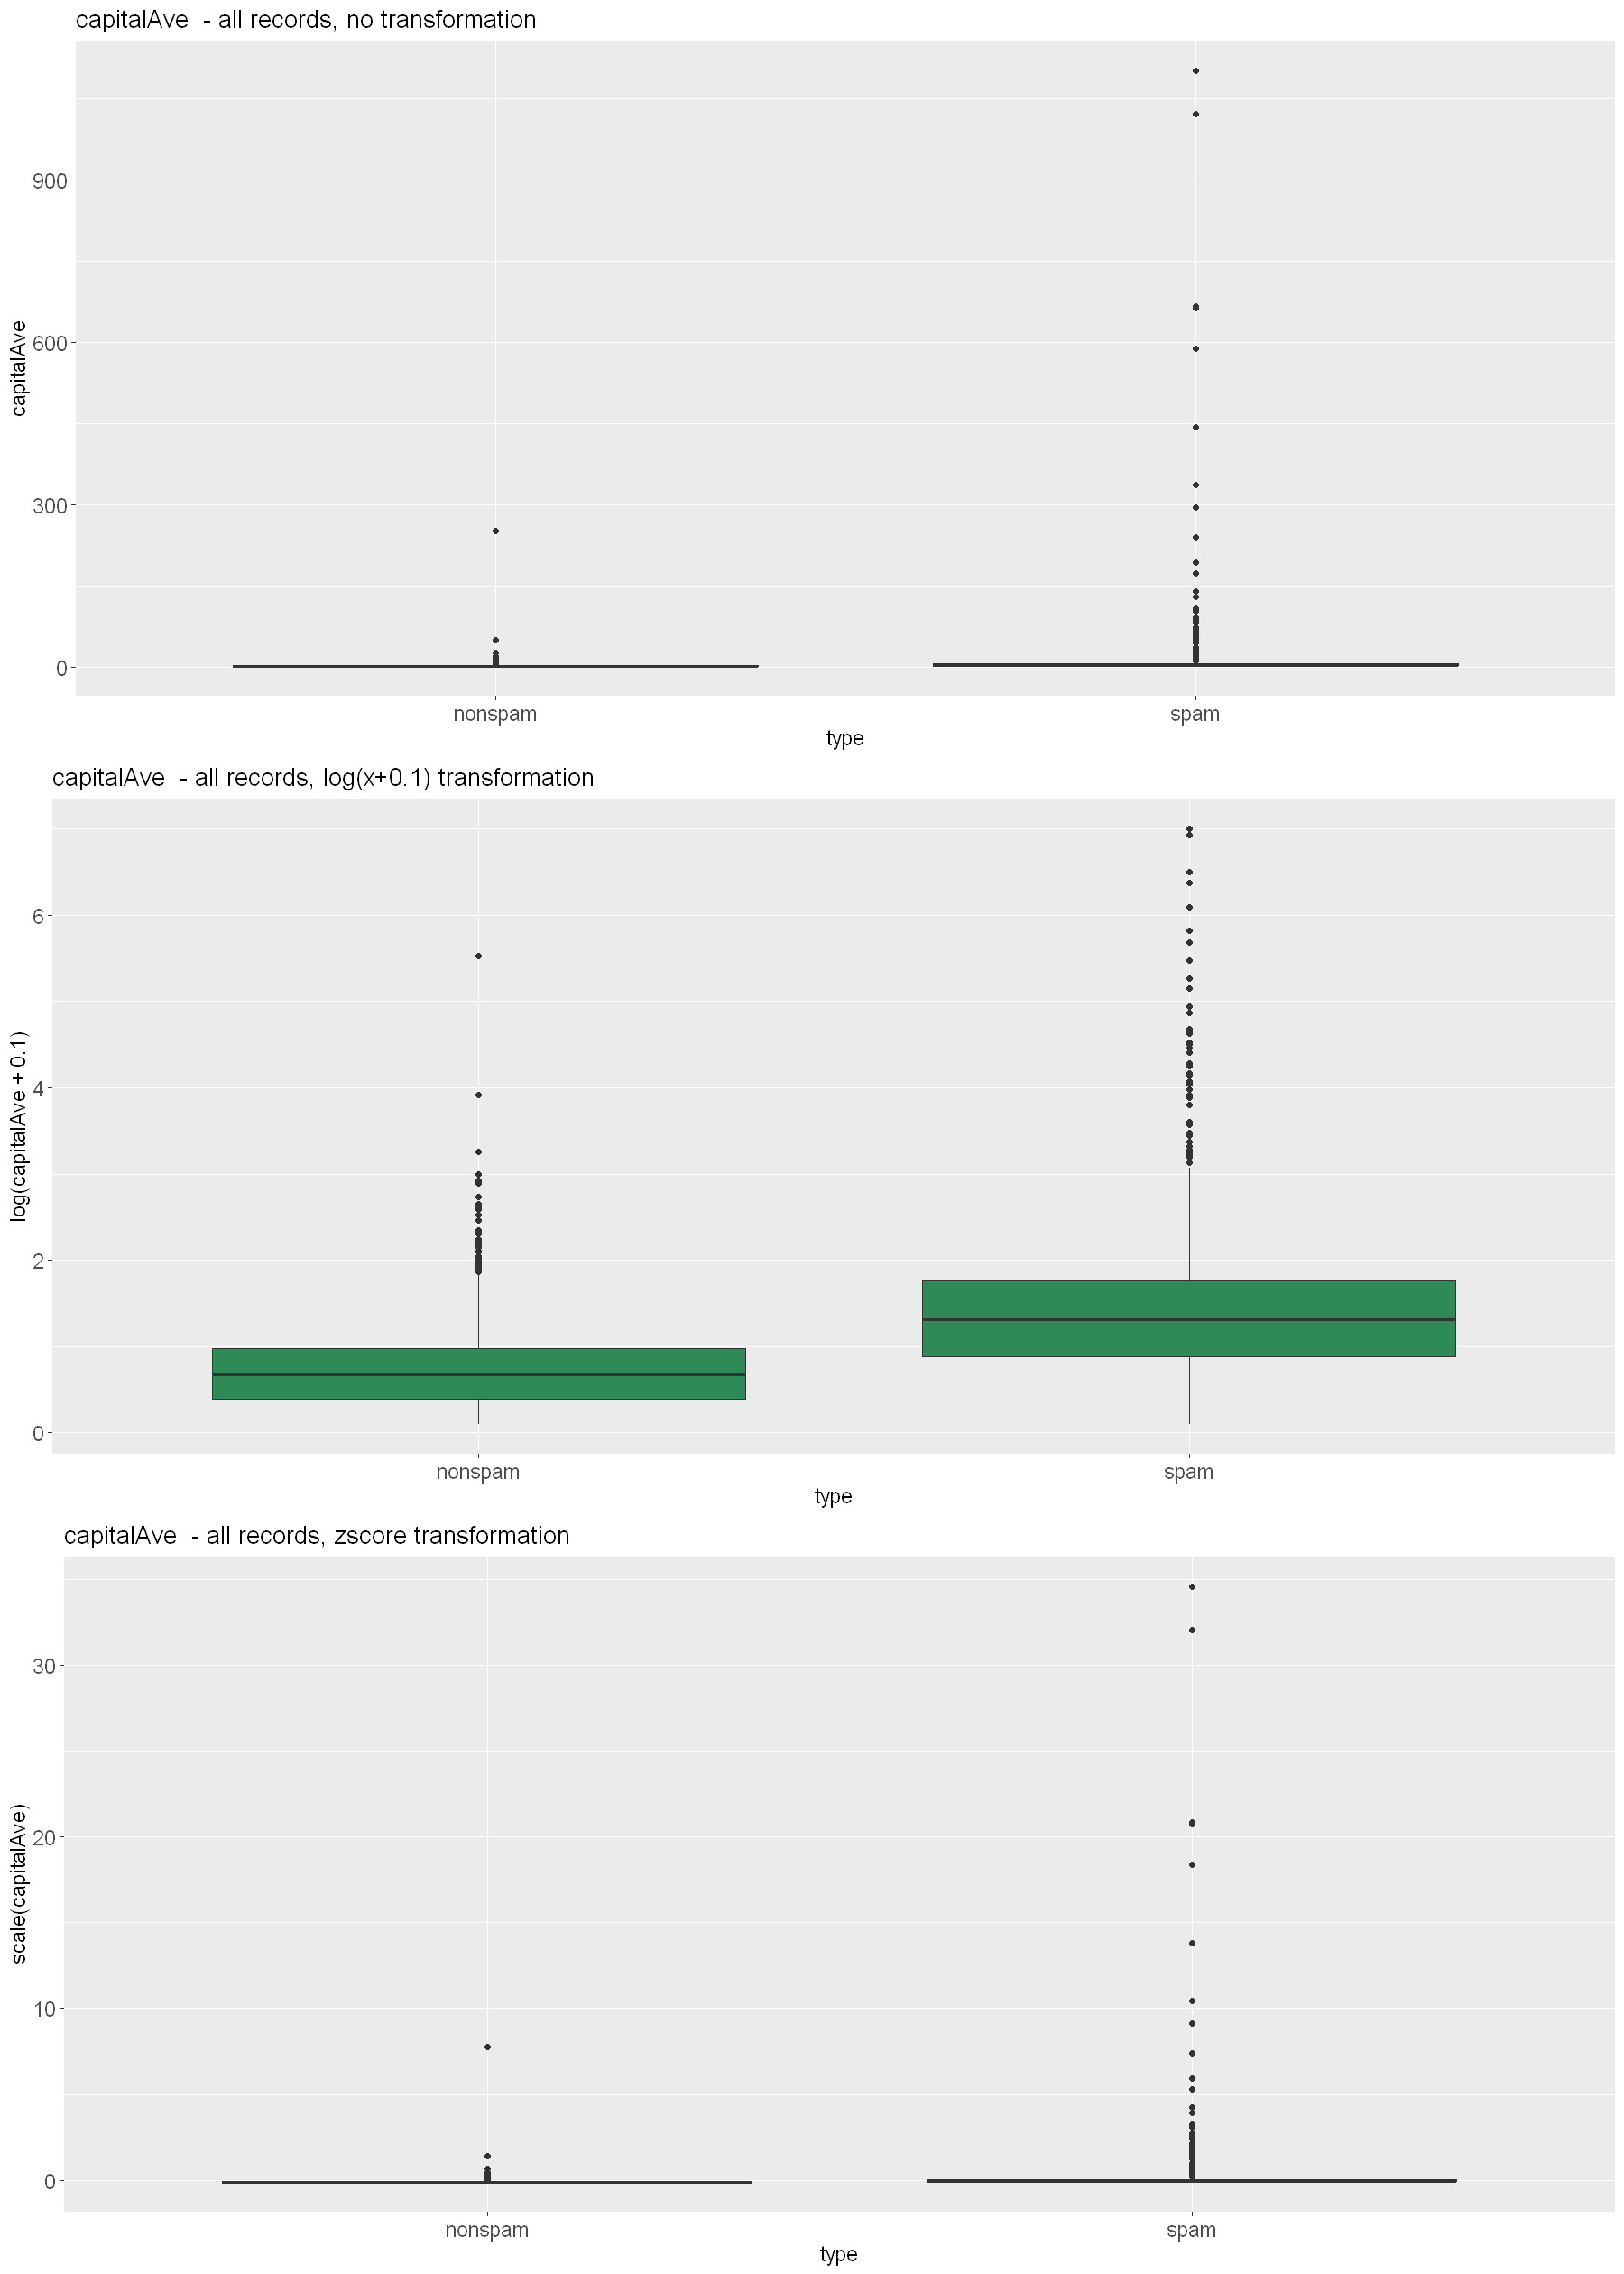

In [15]:
boxplots('capitalAve', nonzero = FALSE)

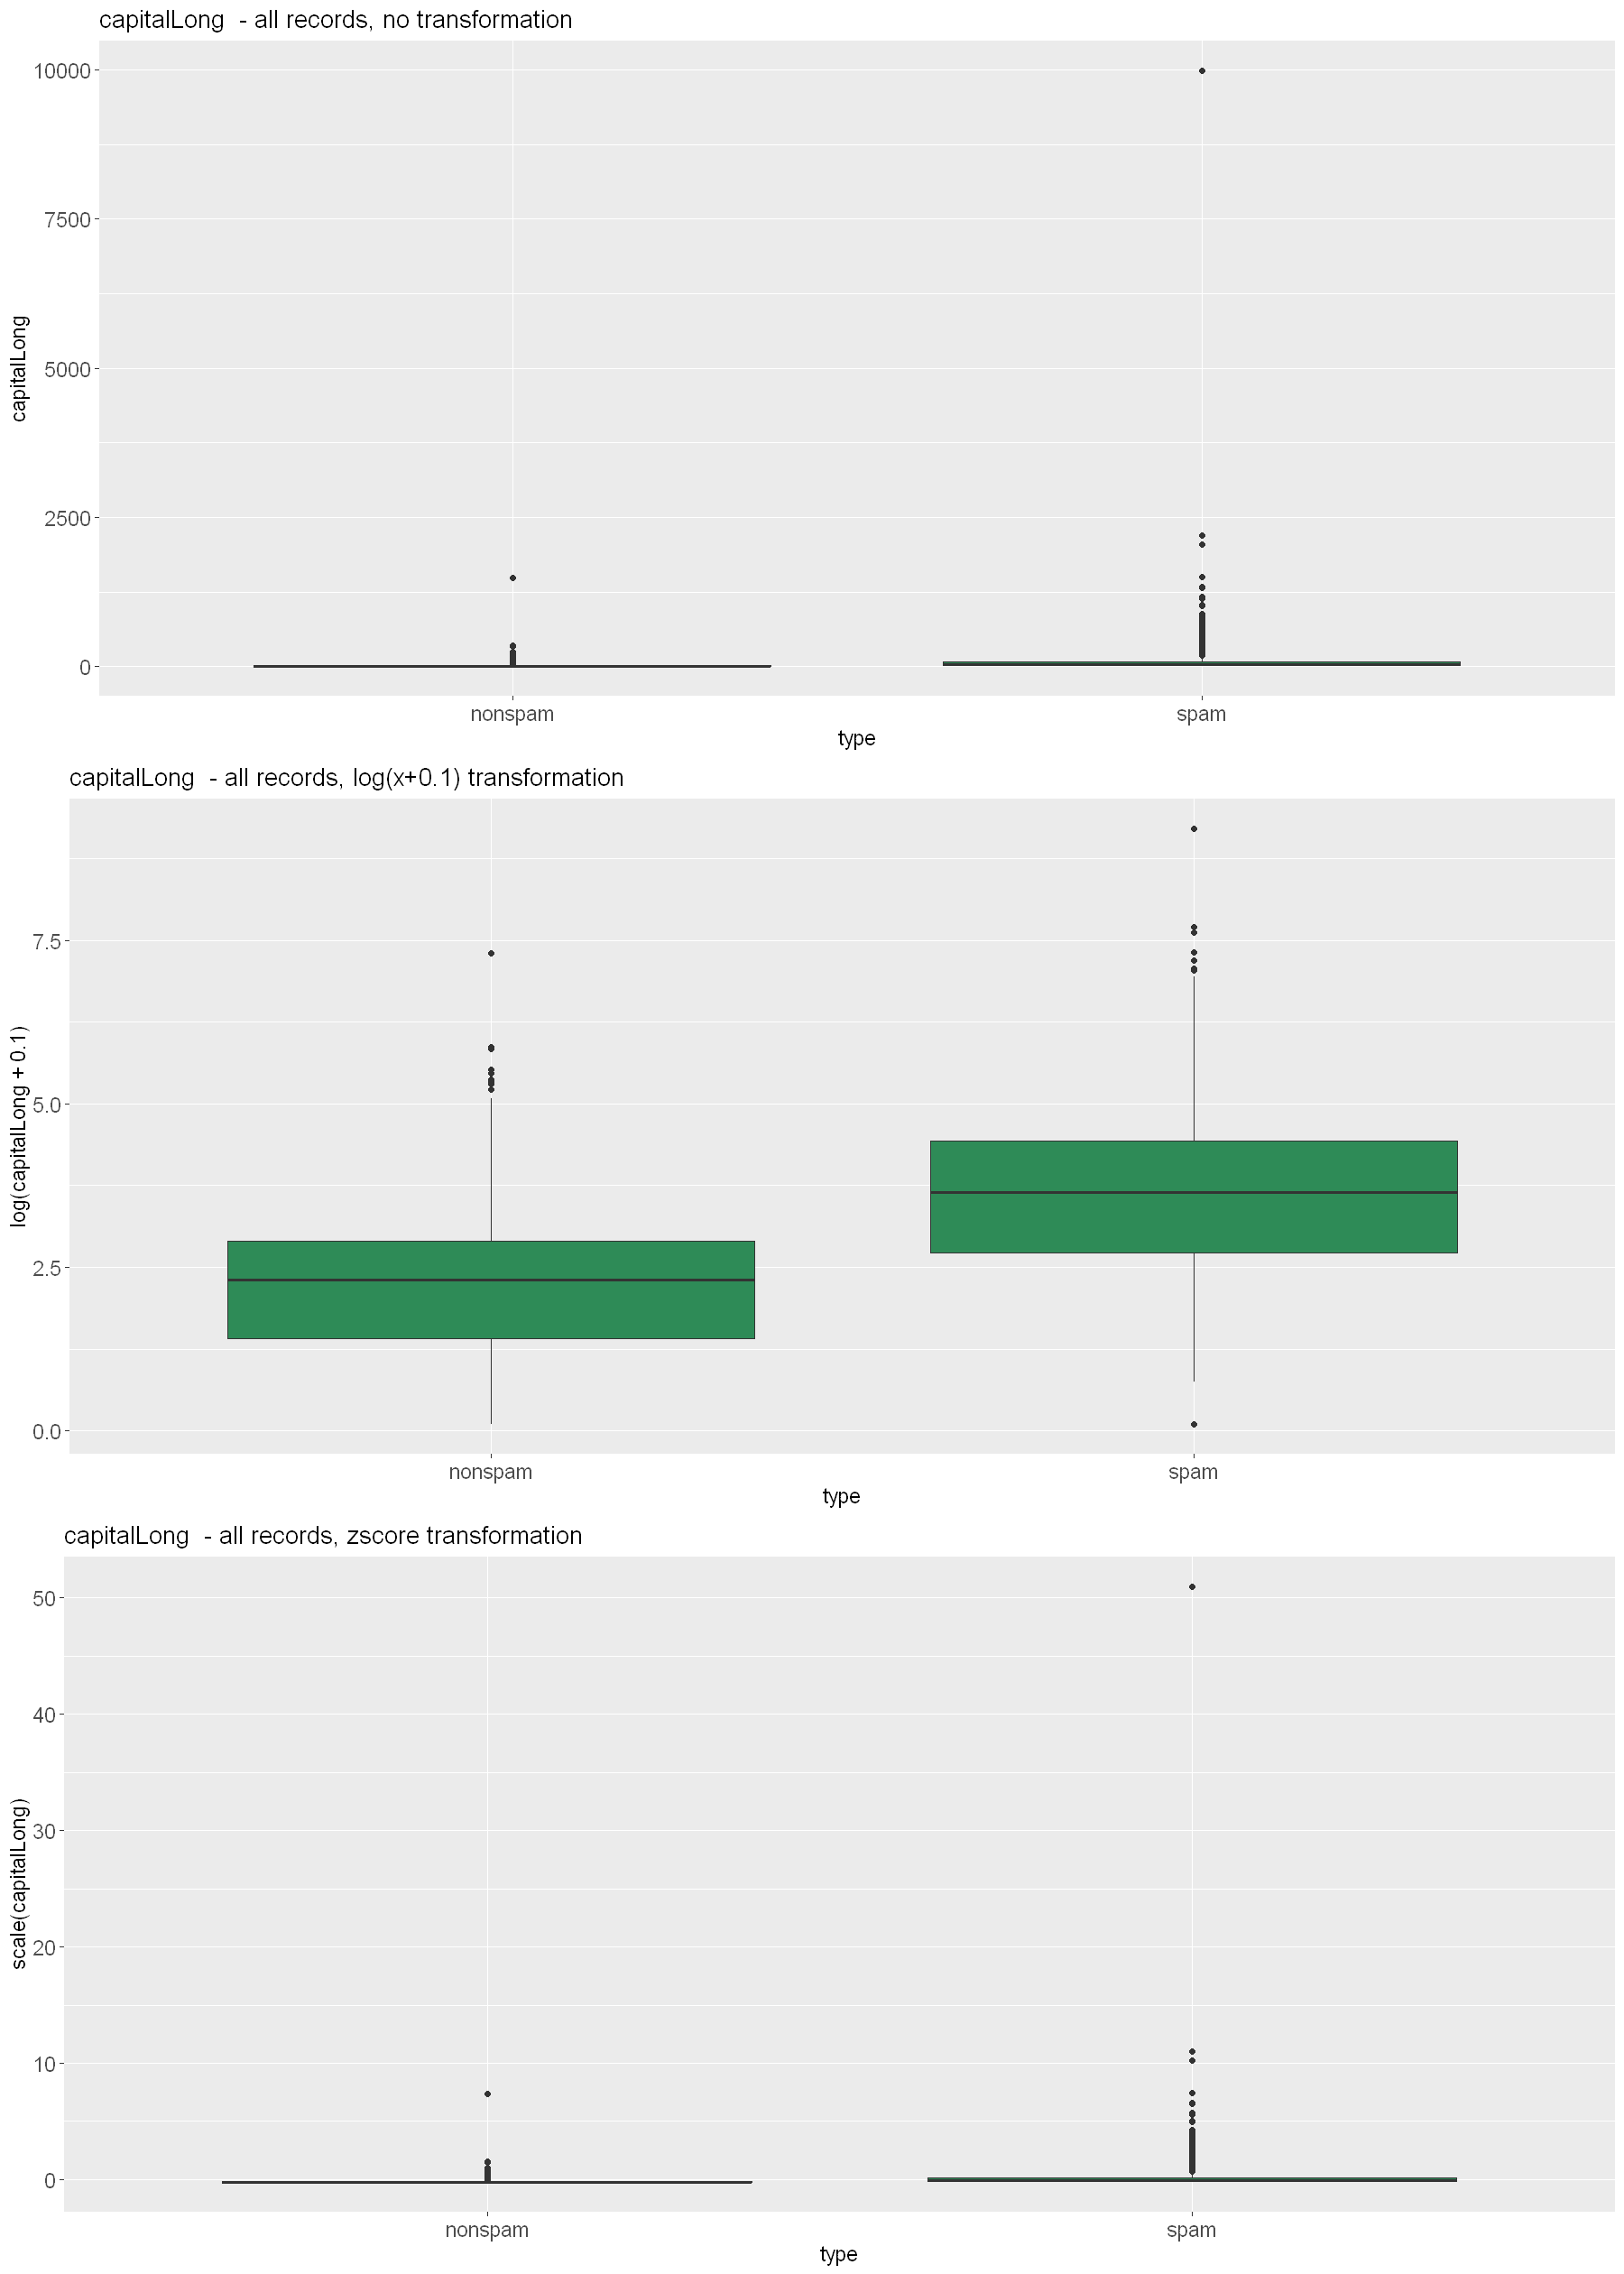

In [16]:
boxplots('capitalLong', nonzero = FALSE)

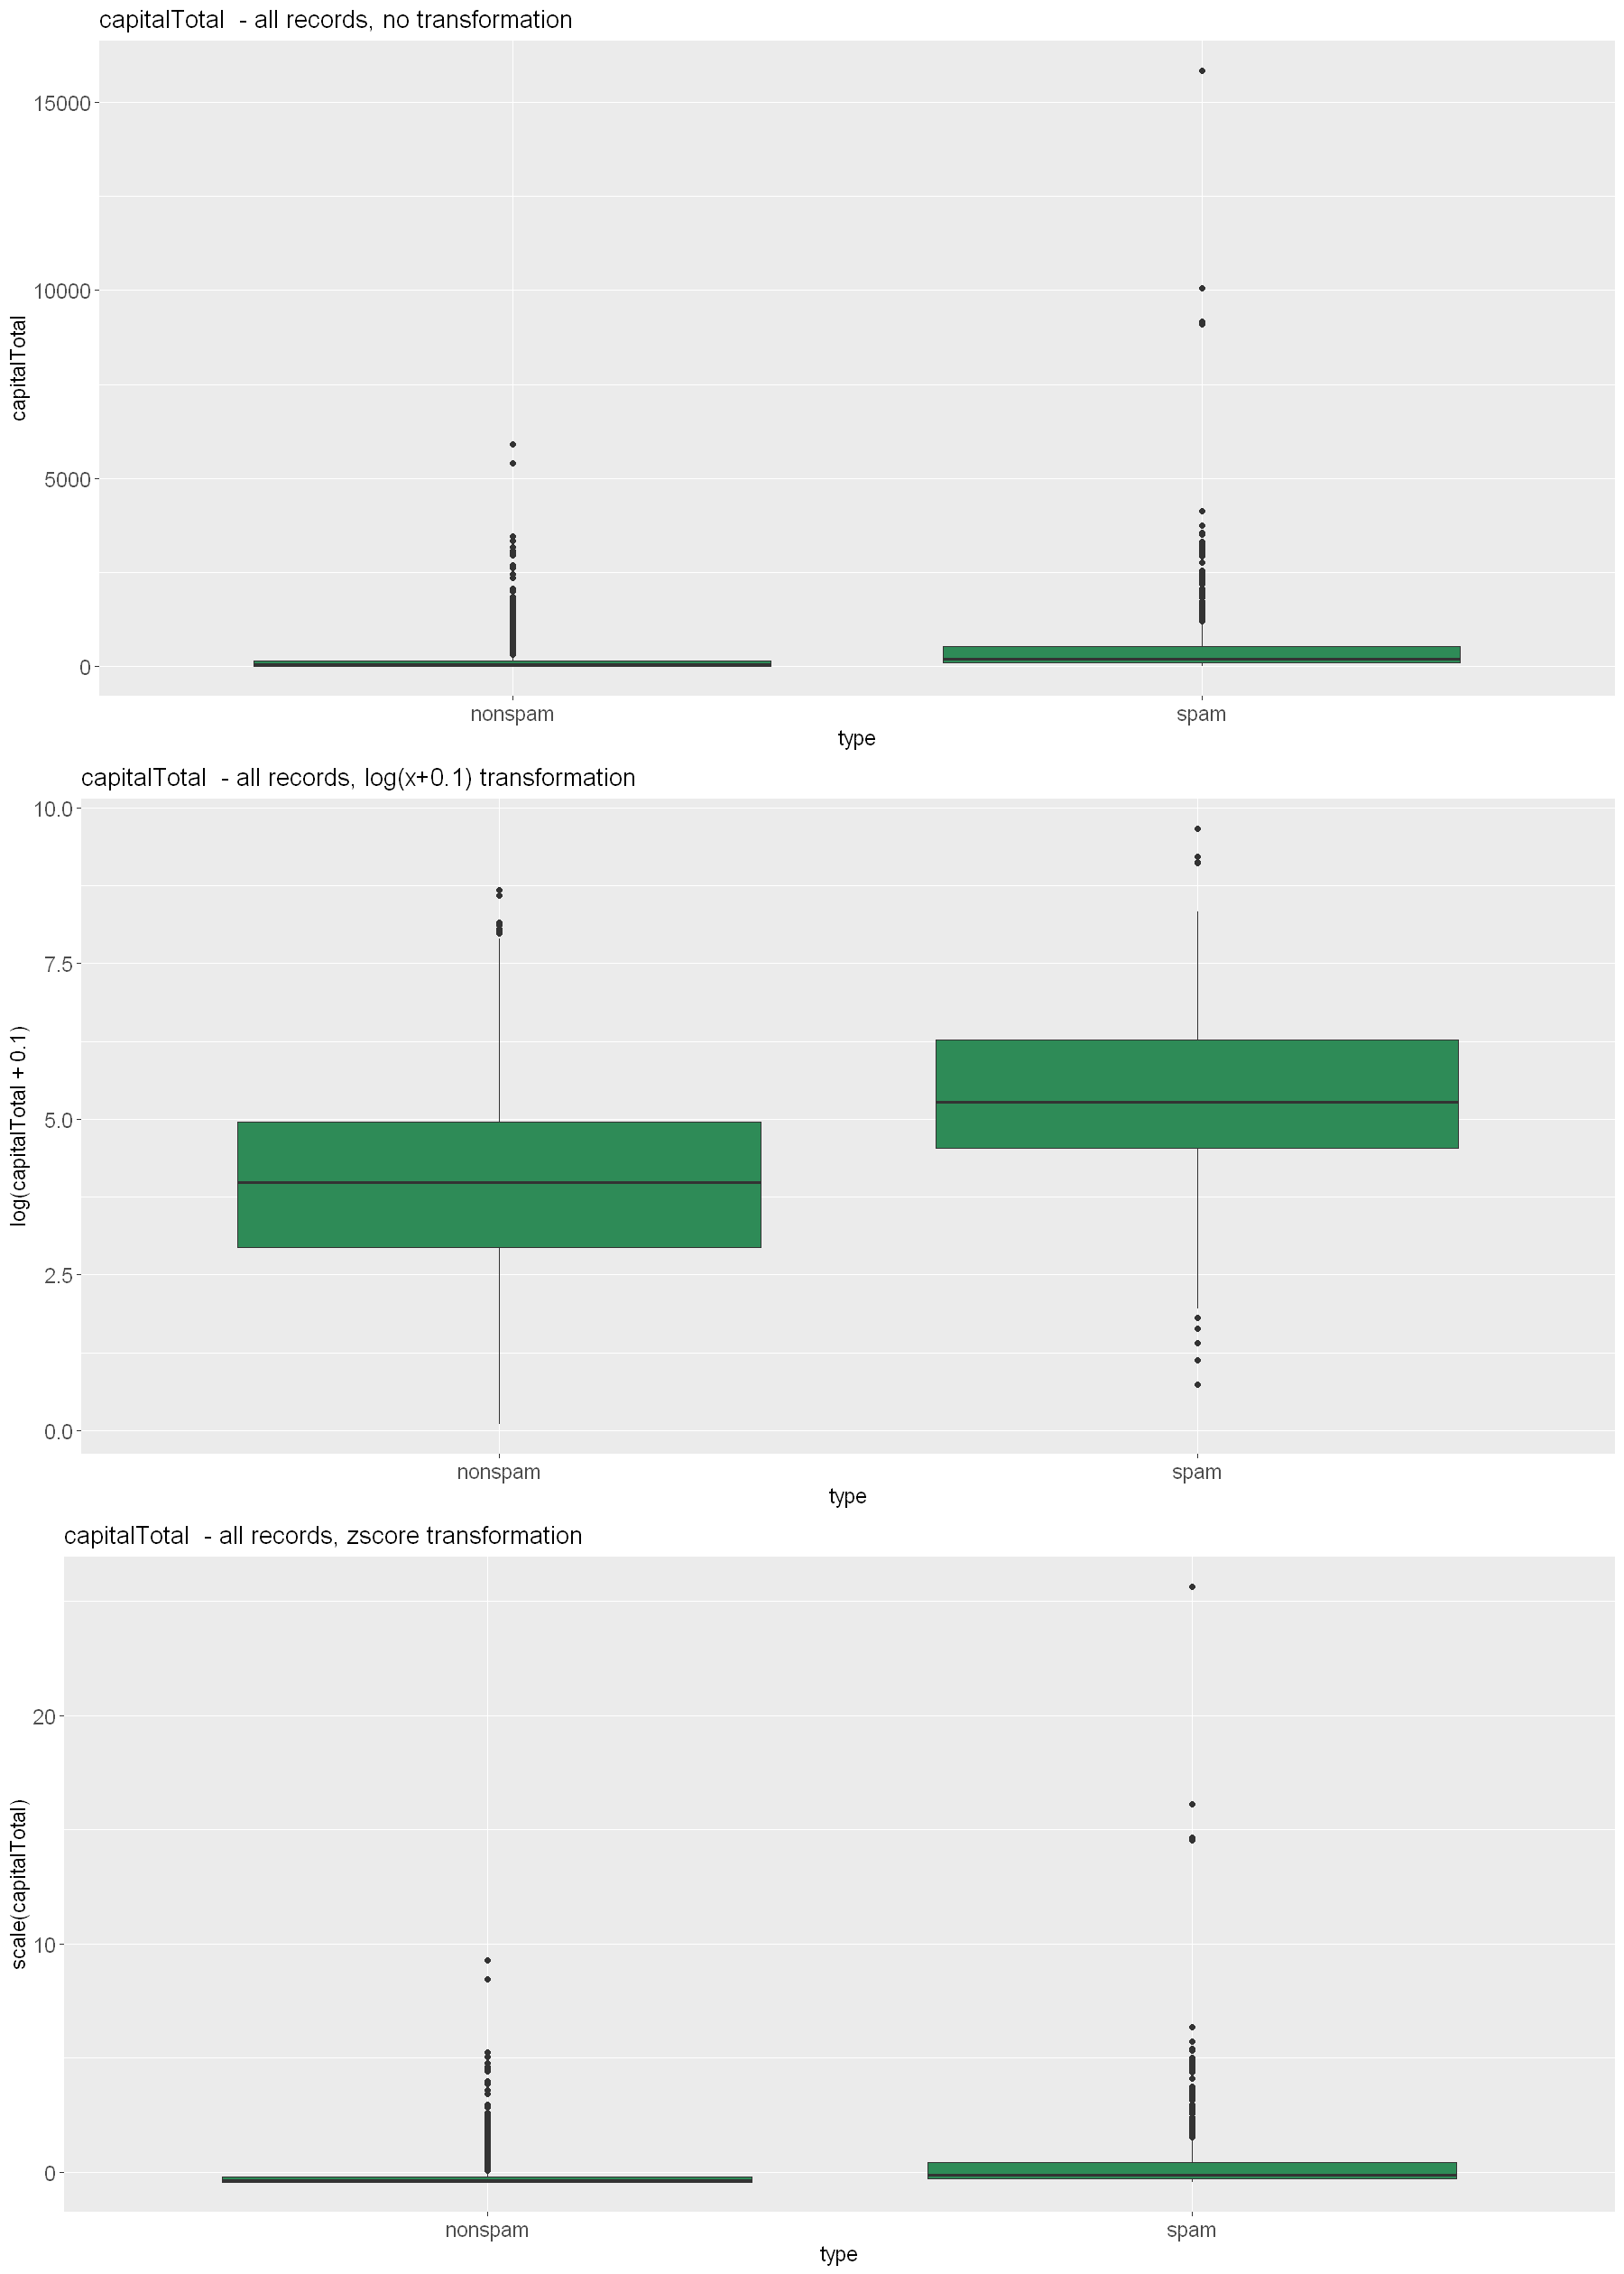

In [17]:
boxplots('capitalTotal', nonzero = FALSE)